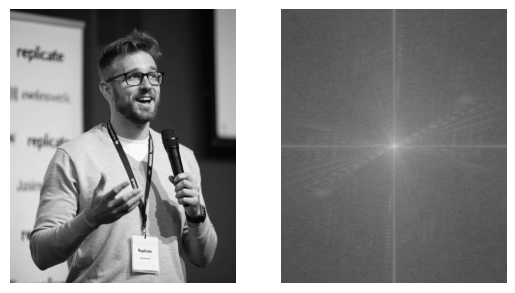

1088
[[3688.       1976.4248   1613.5676   ...  122.775665 1613.5676
  1976.4248  ]
 [1622.2423    903.0281   1306.0414   ... 2275.7947   1781.7078
   968.16797 ]
 [1004.40643  2354.5774   1226.0455   ... 2313.6575    363.49838
  1320.7942  ]
 ...
 [1327.0658    947.86115  1023.48193  ...  639.15784  2211.4473
  2633.8174  ]
 [1004.40643  1320.7942    363.49838  ... 1561.4501   1226.0455
  2354.5774  ]
 [1622.2423    968.16797  1781.7078   ... 1847.4854   1306.0414
   903.0281  ]]


In [76]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
image_filename = r"C:\Users\Tristan\Downloads\spurhacks\myEnv\MAITest.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = Image.open(image_filename).convert("L")  # Convert to grayscale
image = np.array(image, dtype=np.float32)
# plt.set_cmap("gray")

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()
print(len(ft))
print(abs(ft))

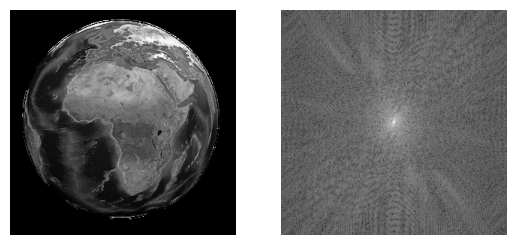

301
[[19.68428   15.671433  16.673082  ... 16.682129  16.178268  10.851052 ]
 [18.74753   11.972392   5.9605913 ... 15.098612  10.118551   8.613353 ]
 [17.55712   10.897227  12.149252  ... 16.4371    15.689184  17.725376 ]
 ...
 [17.725376  15.689184  16.4371    ... 12.149252  10.897227  17.55712  ]
 [ 8.613353  10.118551  15.098612  ...  5.9605913 11.972392  18.74753  ]
 [10.851052  16.178268  16.682129  ... 16.673082  15.671433  19.68428  ]]


In [15]:

import numpy as np
import matplotlib.pyplot as plt

image_filename = "Earth.png"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

plt.set_cmap("gray")

ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()
print(len(ft))
print(abs(ft))

{'fft_vert_line_energy': np.float64(0.0009481333423705117), 'fft_horiz_line_energy': np.float64(0.001521860216505798)}


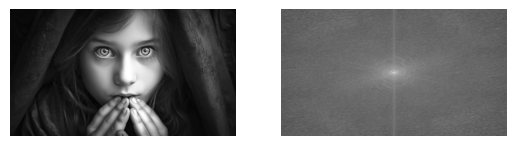

[[ -627.89220304-3942.81037481j  3751.30830374-1366.63392344j
   2055.44186765+3422.74173713j ...  3651.34078465+1614.84139924j
   -890.58638016+3891.89647471j -3990.2508889  -133.79130756j]
 [ -593.46122013-3948.13956828j  3763.09144486-1333.84596113j
   2025.49492545+3440.54829604j ...  3637.10978199+1646.64346601j
   -924.5152421 +3883.97654956j -3988.93141778 -168.60727923j]
 [ -558.98504285-3953.16809562j  3774.58801199-1300.95642129j
   1995.39373397+3458.09284387j ...  3622.60179933+1678.32013449j
   -958.37369862+3875.76084455j -3987.30817409 -203.4104108j ]
 ...
 [ -730.88778343-3925.02297043j  3714.2485185 -1464.36341568j
   2144.33445258+3367.7636535j  ...  3692.36118119+1518.70707445j
   -788.40322561+3913.87565263j -3992.38577772  -29.29286937j]
 [ -696.60810118-3931.25163577j  3726.88591063-1431.89513566j
   2114.86389382+3386.3480301j  ...  3678.9675362 +1550.87076766j
   -822.52778045+3906.8465955j  -3991.97813464  -64.1314502j ]
 [ -662.27536952-3937.18092108j  3739.23

In [54]:

import numpy as np
import matplotlib.pyplot as plt

image_filename = r"C:\Users\Tristan\Downloads\spurhacks\myEnv\AI-Generated-vs-Real-Images-Datasets\AiArtData\AiArtData\1a9B6fCE7uFAgaQDUMGFRqw.jpeg"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

def calculate_distance_from_centre(coords, centre):
    # Distance from centre is √(x^2 + y^2)
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

  
    
# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = len(image)#Column
centre = int((array_size - 1) / 2)

# Get all coordinate pairs in the left half of the array,
# including the column at the centre of the array (which
# includes the centre pixel)
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre+1)
)
coords_left_half = sorted(
    coords_left_half,
    key=lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap("gray")
def compute_fft(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.abs(fft_shift)
    log_magnitude = np.log1p(magnitude_spectrum)  # log scale
    return log_magnitude

def fft_line_energy(log_mag):
    h, w = log_mag.shape
    vertical_energy = np.sum(log_mag[:, w // 2])
    horizontal_energy = np.sum(log_mag[h // 2, :])
    total_energy = np.sum(log_mag)
    return {
        "fft_vert_line_energy": vertical_energy / total_energy,
        "fft_horiz_line_energy": horizontal_energy / total_energy,
    }

test=compute_fft(image)
print(fft_line_energy(test))
ft = calculate_2dft(image)

plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.show()
test=list(coords_left_half)
# print(len(test))
# print(test)
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype="complex"
)
idx = 0
# Step 2
for coords in coords_left_half:
    # Central column: only include if points in top half of
    # the central column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        # Step 3
        # Copy values from Fourier transform into
        # individual_grating for the pair of points in
        # current iteration
        
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
        if idx==1:
            print(calculate_2dft(individual_grating))
# print(individual_grating)
print(individual_grating.shape)

In [ ]:
import numpy as np
import scipy.ndimage
from skimage.feature import peak_local_max
from scipy.spatial.distance import pdist
from scipy.stats import kurtosis, skew, pearsonr
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
def compute_fft(img):
    """
    Compute the log-magnitude spectrum of the grayscale image `img`.
    `img` should be a 2D numpy array (grayscale).
    """
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = np.abs(fft_shift)
    log_magnitude = np.log1p(magnitude_spectrum)  # log scale
    return log_magnitude

def fft_line_energy(log_mag):
    """
    Compute central vertical/horizontal line energy ratios.
    Returns (vertical_ratio, horizontal_ratio).
    """
    h, w = log_mag.shape
    vertical_energy = np.sum(log_mag[:, w // 2])
    horizontal_energy = np.sum(log_mag[h // 2, :])
    total_energy = np.sum(log_mag) + 1e-8
    return (
        vertical_energy / total_energy,
        horizontal_energy / total_energy,
    )

def fft_central_cross_ratio(log_mag):
    """
    Central cross energy ratio: sum of central row + column over total energy.
    """
    h, w = log_mag.shape
    central_row = log_mag[h // 2, :]
    central_col = log_mag[:, w // 2]
    # central pixel counted twice; subtract once
    total_energy = np.sum(log_mag) + 1e-8
    cross_energy = np.sum(central_row) + np.sum(central_col) - log_mag[h // 2, w // 2]
    return cross_energy / total_energy

def radial_profile(log_mag, nbins=100):
    """
    Compute radial profile: average of log_mag over rings.
    Returns:
      bin_centers: array of radii
      profile: array of average log_mag for each radius bin
    """
    h, w = log_mag.shape
    center = (h // 2, w // 2)
    y, x = np.indices((h, w))
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    r_flat = r.flatten()
    mag_flat = log_mag.flatten()
    # Bin radii
    max_r = np.max(r_flat)
    bins = np.linspace(0, max_r, nbins + 1)
    bin_idxs = np.digitize(r_flat, bins) - 1  # indices 0..nbins-1
    profile = np.zeros(nbins)
    counts = np.zeros(nbins)
    for i in range(len(r_flat)):
        idx = bin_idxs[i]
        if 0 <= idx < nbins:
            profile[idx] += mag_flat[i]
            counts[idx] += 1
    # Avoid division by zero
    nonzero = counts > 0
    profile[nonzero] /= counts[nonzero]
    # Bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2
    return bin_centers[nonzero], profile[nonzero]

def fft_radial_slope(log_mag, fit_range=(0.05, 0.5), nbins=200):
    """
    Fit a power-law slope on the radial profile in log-log:
    P(r) ~ r^alpha, so log P vs log r slope is alpha.
    fit_range: tuple fractions of max radius (e.g. 0.05 to 0.5 of max radius).
    Returns slope alpha.
    """
    bin_centers, profile = radial_profile(log_mag, nbins=nbins)
    # Exclude zero radius
    # Normalize radius to [0,1]
    max_r = np.max(bin_centers)
    norm_r = bin_centers / (max_r + 1e-8)
    # Select fit indices
    mask = (norm_r >= fit_range[0]) & (norm_r <= fit_range[1]) & (profile > 0)
    if np.sum(mask) < 2:
        return np.nan
    log_r = np.log(norm_r[mask])
    log_p = np.log(profile[mask])
    # Fit linear model: log_p = alpha * log_r + c
    alpha, intercept = np.polyfit(log_r, log_p, 1)
    return alpha

def fft_high_low_freq_ratio(log_mag, low_frac=0.1, high_frac=0.4):
    """
    Ratio of high-frequency energy to low-frequency energy.
    low_frac: radius fraction below which is considered low-frequency.
    high_frac: radius fraction above which is considered high-frequency.
    """
    h, w = log_mag.shape
    center = (h // 2, w // 2)
    y, x = np.indices((h, w))
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    max_r = np.max(r)
    low_mask = r < (max_r * low_frac)
    high_mask = r > (max_r * high_frac)
    low_sum = np.sum(log_mag[low_mask])
    high_sum = np.sum(log_mag[high_mask])
    return high_sum / (low_sum + 1e-8)

def fft_mid_band_gap(log_mag, fit_range=(0.05, 0.5), mid_range=(0.15, 0.35), nbins=200):
    """
    Compute mid-band gap index: difference between expected power-law profile
    and actual in mid-frequency band.
    Returns mean relative deviation in mid band: (expected - actual) / expected.
    """
    # Get radial profile and fit slope
    bin_centers, profile = radial_profile(log_mag, nbins=nbins)
    max_r = np.max(bin_centers)
    norm_r = bin_centers / (max_r + 1e-8)
    mask_fit = (norm_r >= fit_range[0]) & (norm_r <= fit_range[1]) & (profile > 0)
    if np.sum(mask_fit) < 2:
        return np.nan
    log_r = np.log(norm_r[mask_fit])
    log_p = np.log(profile[mask_fit])
    alpha, intercept = np.polyfit(log_r, log_p, 1)
    # Expected in mid band
    mask_mid = (norm_r >= mid_range[0]) & (norm_r <= mid_range[1])
    if not np.any(mask_mid):
        return np.nan
    expected = np.exp(intercept) * (norm_r[mask_mid] ** alpha)
    actual = profile[mask_mid]
    # Compute relative gap: positive if expected > actual (deficit)
    rel_gap = (expected - actual) / (expected + 1e-8)
    return np.mean(rel_gap)

def fft_entropy(log_mag, bins=128):
    """
    Compute Shannon entropy of flattened log-magnitude spectrum.
    """
    hist, _ = np.histogram(log_mag.flatten(), bins=bins, density=True)
    hist += 1e-8
    entropy = -np.sum(hist * np.log(hist))
    return entropy

def fft_peak_features(log_mag, threshold_ratio=0.6, min_distance=10):
    """
    Detect peaks in normalized log-magnitude spectrum and compute:
    - peak_count: number of peaks
    - regularity: stddev of pairwise distances among peaks
    """
    norm_fft = (log_mag - log_mag.min()) / (log_mag.max() - log_mag.min() + 1e-8)
    peaks = peak_local_max(norm_fft, min_distance=min_distance, threshold_abs=threshold_ratio)
    peak_count = len(peaks)
    if peak_count > 1:
        dists = pdist(peaks)
        regularity = np.std(dists)
    else:
        regularity = 0.0
    return peak_count, regularity

def fft_angular_variance(log_mag, n_bins=36):
    """
    Compute angular energy variance: split 0-360 degrees into bins, sum energy in each,
    return variance.
    """
    h, w = log_mag.shape
    center = (h // 2, w // 2)
    y, x = np.indices((h, w))
    angles = np.arctan2(y - center[0], x - center[1])
    angles = (angles + np.pi) * (180 / np.pi)  # 0 to 360
    bins = np.linspace(0, 360, n_bins + 1)
    angular_energy = np.zeros(n_bins)
    for i in range(n_bins):
        mask = (angles >= bins[i]) & (angles < bins[i+1])
        angular_energy[i] = np.sum(log_mag[mask])
    return np.var(angular_energy)

def fft_kurtosis_skew(log_mag):
    """
    Compute kurtosis and skew of log-magnitude values.
    """
    flat = log_mag.flatten()
    return kurtosis(flat), skew(flat)

def fft_rgb_cross_spectral_corr(img_color):
    """
    Compute cross-spectral correlation between RGB channels.
    img_color: HxWx3 array.
    Returns correlation coefficients between pairs (R-G, R-B, G-B).
    """
    # Compute FFT magnitude for each channel
    corrs = []
    for i in range(3):
        for j in range(i+1, 3):
            ft_i = compute_fft(img_color[..., i])
            ft_j = compute_fft(img_color[..., j])
            # Flatten and compute Pearson correlation
            flat_i = ft_i.flatten()
            flat_j = ft_j.flatten()
            corr, _ = pearsonr(flat_i, flat_j)
            corrs.append(corr)
    # Return as tuple (R-G, R-B, G-B)
    return tuple(corrs)

def extract_fft_features(image_path):
    """
    Read image from path, convert to grayscale and color as needed, then compute a feature vector
    containing all implemented FFT-based metrics.
    Returns a dict of feature_name: value.
    """
    # Read with cv2 to ensure consistent handling; supports many formats
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Unable to read image: {image_path}")
    # If image has alpha channel, drop it
    if img.ndim == 3 and img.shape[2] == 4:
        img = img[..., :3]
    # Convert to float grayscale for FFT
    if img.ndim == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
    else:
        gray = img.astype(np.float32)
    # Normalize grayscale to [0,1]
    gray = gray - gray.min()
    if gray.max() > 0:
        gray = gray / gray.max()
    log_mag = compute_fft(gray)
    features = {}
    # Central cross
    v_line, h_line = fft_line_energy(log_mag)
    features['fft_vertical_line_ratio'] = v_line
    features['fft_horizontal_line_ratio'] = h_line
    features['fft_central_cross_ratio'] = fft_central_cross_ratio(log_mag)
    # Radial features
    features['fft_radial_slope'] = fft_radial_slope(log_mag)
    features['fft_high_low_freq_ratio'] = fft_high_low_freq_ratio(log_mag)
    features['fft_mid_band_gap'] = fft_mid_band_gap(log_mag)
    # Spectral entropy
    features['fft_entropy'] = fft_entropy(log_mag)
    # Peak features
    peak_count, peak_reg = fft_peak_features(log_mag)
    features['fft_peak_count'] = peak_count
    features['fft_peak_regularity'] = peak_reg
    # Angular
    features['fft_angular_variance'] = fft_angular_variance(log_mag)
    # Kurtosis & skew
    k, s = fft_kurtosis_skew(log_mag)
    features['fft_kurtosis'] = k
    features['fft_skew'] = s
    # Cross-spectral correlations (if color)
    if img.ndim == 3 and img.shape[2] == 3:
        # Convert BGR (cv2) to RGB order
        img_rgb = img[..., ::-1].astype(np.float32)
        # Normalize each channel to [0,1]
        for c in range(3):
            ch = img_rgb[..., c]
            ch = ch - ch.min()
            if ch.max() > 0:
                img_rgb[..., c] = ch / ch.max()
        corr_rg, corr_rb, corr_gb = fft_rgb_cross_spectral_corr(img_rgb)
        features['fft_corr_rg'] = corr_rg
        features['fft_corr_rb'] = corr_rb
        features['fft_corr_gb'] = corr_gb
    return features
def print_fft_metrics(image_path):
    """
    Prints all FFT-based metrics for a given image path in a clean format.
    """
    try:
        features = extract_fft_features(image_path)
        print(f"\nFFT Metrics for: {image_path}\n" + "-" * 50)
        for k, v in sorted(features.items()):
            print(f"{k:30s}: {v:.6f}" if isinstance(v, (int, float)) else f"{k:30s}: {v}")
    except Exception as e:
        print(e)
        print(f"Error processing {image_path}: {e}")
print_fft_metrics(r"c:\Users\Tristan\Downloads\REAL\1001.jpg")
'''
fft_angular_variance          : 92.453832
fft_central_cross_ratio       : 0.08583623915910721
fft_corr_gb                   : 0.9450838565826416
fft_corr_rb                   : 0.93628990650177
fft_corr_rg                   : 0.9865627288818359
fft_entropy                   : 16.589034
fft_high_low_freq_ratio       : 9.786016464233398
fft_horizontal_line_ratio     : 0.03878769651055336
fft_kurtosis                  : 4.153721809387207
fft_mid_band_gap              : -0.092205
fft_peak_count                : 1.000000
fft_peak_regularity           : 0.000000
fft_radial_slope              : -0.570315
fft_skew                      : 1.528805
fft_vertical_line_ratio       : 0.0523960255086422

fft_angular_variance          : 92.787098
fft_central_cross_ratio       : 0.14453037083148956
fft_corr_gb                   : 0.9746994972229004
fft_corr_rb                   : 0.9797655344009399
fft_corr_rg                   : 0.9908949732780457
fft_entropy                   : 15.058148
fft_high_low_freq_ratio       : 6.792475700378418
fft_horizontal_line_ratio     : 0.0559978112578392
fft_kurtosis                  : 4.22039794921875
fft_mid_band_gap              : -0.102465
fft_peak_count                : 1.000000
fft_peak_regularity           : 0.000000
fft_radial_slope              : -0.728636
fft_skew                      : 1.683959
fft_vertical_line_ratio       : 0.09533346444368362

'''


FFT Metrics for: c:\Users\Tristan\Downloads\REAL\1001.jpg
--------------------------------------------------
fft_angular_variance          : 92.787098
fft_central_cross_ratio       : 0.14453037083148956
fft_corr_gb                   : 0.9746994972229004
fft_corr_rb                   : 0.9797655344009399
fft_corr_rg                   : 0.9908949732780457
fft_entropy                   : 15.058148
fft_high_low_freq_ratio       : 6.792475700378418
fft_horizontal_line_ratio     : 0.0559978112578392
fft_kurtosis                  : 4.22039794921875
fft_mid_band_gap              : -0.102465
fft_peak_count                : 1.000000
fft_peak_regularity           : 0.000000
fft_radial_slope              : -0.728636
fft_skew                      : 1.683959
fft_vertical_line_ratio       : 0.09533346444368362


'\nfft_angular_variance          : 92.453832\nfft_central_cross_ratio       : 0.08583623915910721\nfft_corr_gb                   : 0.9450838565826416\nfft_corr_rb                   : 0.93628990650177\nfft_corr_rg                   : 0.9865627288818359\nfft_entropy                   : 16.589034\nfft_high_low_freq_ratio       : 9.786016464233398\nfft_horizontal_line_ratio     : 0.03878769651055336\nfft_kurtosis                  : 4.153721809387207\nfft_mid_band_gap              : -0.092205\nfft_peak_count                : 1.000000\nfft_peak_regularity           : 0.000000\nfft_radial_slope              : -0.570315\nfft_skew                      : 1.528805\nfft_vertical_line_ratio       : 0.0523960255086422\n\n\n'

In [68]:
realData=r"C:\Users\Tristan\Downloads\spurhacks\myEnv\preComputedFFT\REAL"
fakeData=r"C:\Users\Tristan\Downloads\spurhacks\myEnv\preComputedFFT\FAKE"

filePaths=[]
for file in os.listdir(realData):
    if "..txt" in file:
        newName=file[:-5]
        newName+=".txt"
        print(newName)
        os.rename(os.path.join(realData,file),os.path.join(realData,newName))
    
    
for file in os.listdir(fakeData):
    if "..txt" in file:
        newName=file[:-5]
        newName+=".txt"
        print(newName)
        os.rename(os.path.join(fakeData,file),os.path.join(fakeData,newName))
    
# print(r"C:\\Users\\Tristan\\Downloads\\spurhacks\\myEnv\\preComputedFFT\\FAKE\\landscape2__444ba8e2d22eb8d0b9c065c86d918022.txt")

AIlandscape1A.txt
AI_art_1685017093404_1685017098933.txt
amazonaws.com2Fpublic2Fimages2Fc5e787c1-70fc-4178-9f18-497c6ec85f79_832x832.txt
d5b733ded7a8468d95d56d317703b3da.txt
Dave-McKean-3.txt
Flower-Trip-style.txt
image13.txt
image14.txt
Imagen-comp.txt
Israeli-artist1.txt
lake-with-mountains-digital-download-ai-art-landscape-627.txt
landscape2__444ba8e2d22eb8d0b9c065c86d918022.txt
Midjourney-v6.txt
ndscape-with-mountains-planets-trees-moon-surrealist-escapism-concept-photo.txt
popepufferjacket.jpg.jpg.foto.rm.jpeg.foto.rbig.txt
psychedelic-revelation-ai-artwork-718_300x2x.txt
scenery-art-landscape-ai-987.txt
ting-art-on-a-canvas-with-many-colors-in-art-nouveau-style-1-e1670998298608.txt
tr71123-ai-art.txt
widen_1840x0.txt


In [3]:
from moviepy import VideoFileClip
import os
avgLength=0
length=0
for file in os.listdir(r"C:\Users\Tristan\Downloads\spurhacks\myEnv\aiVideos"):
    videoPath=os.path.join(r"C:\Users\Tristan\Downloads\spurhacks\myEnv\aiVideos", file)
    with VideoFileClip(videoPath) as video:
        avgLength+=video.duration
        length+=1
        # print(video.duration)
for file in os.listdir(r"C:\Users\Tristan\Downloads\spurhacks\myEnv\realVideos"):
    videoPath=os.path.join(r"C:\Users\Tristan\Downloads\spurhacks\myEnv\realVideos", file)
    with VideoFileClip(videoPath) as video:
        avgLength+=video.duration
        length+=1
print(avgLength/length)




15.892121212121214
